#  CHALLENGING EXPERIMENT - LAB 5
### Tejasri B N(19BAI1032), Sruthi Nayagi(19BAI1037),
### A R Arvindh(19BAI1106) and V Padmaja(19BAI1107)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MaxAbsScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics

In [3]:
df = pd.read_csv('Challenging Experiment.csv')

In [4]:
df.shape

(64, 6)

In [5]:
df.tail()

Sample Number   X1  X2  X3     Y2  Z1
59             60  200  10  75   9.53  37
60             61  200  12  30   8.08  39
61             62  200  12  45   8.95  44
62             63  200  12  60   8.86  43
63             64  200  12  75  10.13  38

In [6]:
df.head()

Sample Number  X1  X2  X3    Y2  Z1
0              1  50   6  30  4.86  18
1              2  50   6  45  4.97  19
2              3  50   6  60  5.79  20
3              4  50   6  75  6.28  27
4              5  50   8  30  5.06  19

## STAGE 1 CLASSIFIER

In [7]:
df.drop(['Sample Number'], inplace=True, axis=1)

### Min-Max Normalization

In [8]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df)
minmax_scaled_data = minmax_scaler.transform(df)
df_scaled = pd.DataFrame(minmax_scaled_data, columns=df.columns)

In [9]:
df_scaled

X1        X2        X3        Y2        Z1
0   0.0  0.000000  0.000000  0.000000  0.000000
1   0.0  0.000000  0.333333  0.020873  0.038462
2   0.0  0.000000  0.666667  0.176471  0.076923
3   0.0  0.000000  1.000000  0.269450  0.346154
4   0.0  0.333333  0.000000  0.037951  0.038462
..  ...       ...       ...       ...       ...
59  1.0  0.666667  1.000000  0.886148  0.730769
60  1.0  1.000000  0.000000  0.611006  0.807692
61  1.0  1.000000  0.333333  0.776091  1.000000
62  1.0  1.000000  0.666667  0.759013  0.961538
63  1.0  1.000000  1.000000  1.000000  0.769231

[64 rows x 5 columns]

## CORRELATION 

In [10]:
x1=df_scaled['X1']
x2 = df_scaled['X2']
x3 = df_scaled['X3']
y2 = df_scaled['Y2']

In [11]:
print("Correlation between x1 and x2:",x1.corr(x2))
print("Correlation between x1 and x3:",x1.corr(x3))
print("Correlation between x2 and x3",x2.corr(x3))
print("Correlation between x1 and y2",x1.corr(y2))
print("Correlation between x2 and y2",x2.corr(y2))
print("Correlation between x3 and y2",x3.corr(y2))

Correlation between x1 and x2: 0.0
Correlation between x1 and x3: 0.0
Correlation between x2 and x3 0.0
Correlation between x1 and y2 0.37450511556033417
Correlation between x2 and y2 0.3921760762887563
Correlation between x3 and y2 0.6624442057118024


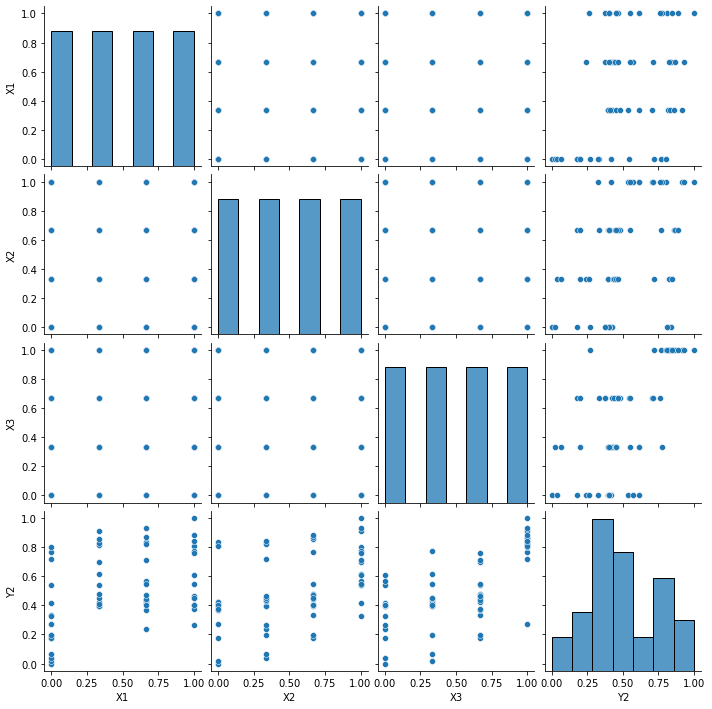

In [12]:
df_scatter = df_scaled[['X1','X2','X3','Y2']]
sns.pairplot(df_scatter)

<AxesSubplot:>

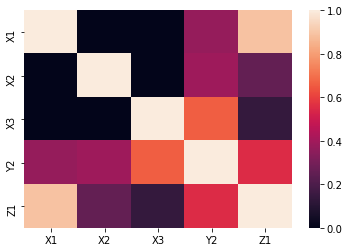

In [13]:
sns.heatmap(df.corr())

##  Regression Model Training

In [14]:
X = df_scaled[['X1', 'X2', 'X3']]
Y = df_scaled['Y2']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

## Declaring Function

In [16]:
def adjusted_r2(predictions):
    n = df_scaled.shape[0]
    p = X.shape[1]
    r2 = metrics.r2_score(y_test, predictions)
    adjusted_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
    return adjusted_r2

In [17]:
mylm = LinearRegression()
mylm.fit(X_train,y_train)

LinearRegression()

In [18]:
mylm.intercept_

-0.043159520133660534

In [19]:
coeff_df = pd.DataFrame(mylm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
X1     0.207338
X2     0.338188
X3     0.503127

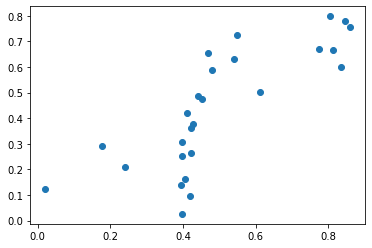

In [20]:
predictions = mylm.predict(X_test)
plt.scatter(y_test,predictions)

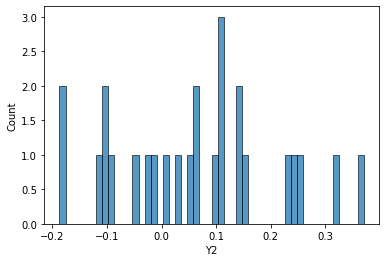

In [21]:
sns.histplot((y_test-predictions),bins=50);

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', metrics.r2_score(y_test, predictions))
print('Adjusted R^2:', adjusted_r2(predictions))

MAE: 0.1294820783913227
MSE: 0.02525536419870136
RMSE: 0.15891936382549912
R^2: 0.422422169162348
Adjusted R^2: 0.39354327762046537


## Ridge Regression

In [23]:
rr = Ridge(alpha=0.01)
rr.fit(X_train,y_train)

Ridge(alpha=0.01)

In [24]:
rr.intercept_

-0.0421105200159555

In [25]:
coeff_df = pd.DataFrame(rr.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
X1     0.207064
X2     0.337454
X3     0.502166

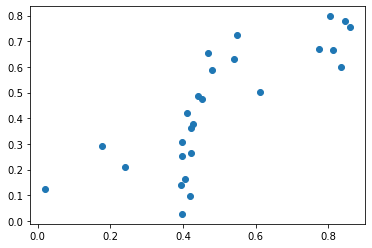

In [26]:
predictions_rr = rr.predict(X_test)
plt.scatter(y_test,predictions_rr)

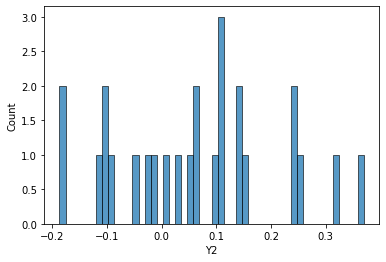

In [27]:
sns.histplot((y_test-predictions_rr),bins=50);

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_rr))
print('MSE:', metrics.mean_squared_error(y_test, predictions_rr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_rr)))
print('R^2:', metrics.r2_score(y_test, predictions_rr))
print('Adjusted R^2:', adjusted_r2(predictions_rr))

MAE: 0.12934439655998847
MSE: 0.025169111869319808
RMSE: 0.15864776036654224
R^2: 0.42439471776299154
Adjusted R^2: 0.3956144536511411


## Lasso Regression

In [29]:
lr = Lasso(alpha=0.01)
lr.fit(X_train,y_train)

Lasso(alpha=0.01)

In [30]:
lr.intercept_

0.06684707839523701

In [31]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
X1     0.149571
X2     0.259558
X3     0.430938

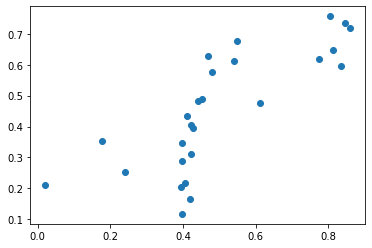

In [32]:
predictions_lr = lr.predict(X_test)
plt.scatter(y_test,predictions_lr)

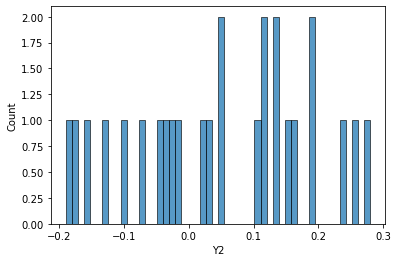

In [33]:
sns.histplot((y_test-predictions_lr),bins=50);

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lr))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lr)))
print('R^2:', metrics.r2_score(y_test, predictions_lr))
print('Adjusted R^2:', adjusted_r2(predictions_lr))

MAE: 0.12184787281700958
MSE: 0.02040225849494773
RMSE: 0.142836474665779
R^2: 0.5334103237241418
Adjusted R^2: 0.5100808399103489


## Elastic Net Regression

In [35]:
enr = ElasticNet(alpha=0.01)
enr.fit(X_train,y_train)

ElasticNet(alpha=0.01)

In [36]:
enr.intercept_

0.029219879308622243

In [37]:
coeff_df = pd.DataFrame(enr.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
X1     0.174150
X2     0.286948
X3     0.450683

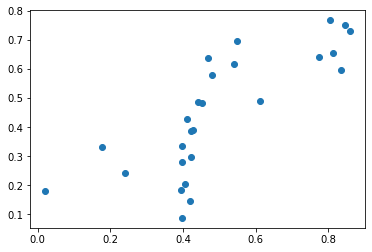

In [38]:
predictions_enr = enr.predict(X_test)
plt.scatter(y_test,predictions_enr)

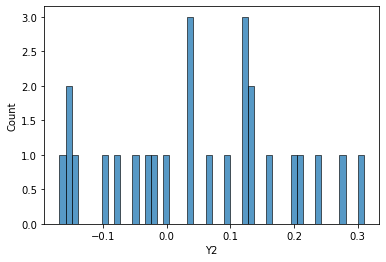

In [39]:
sns.histplot((y_test-predictions_enr),bins=50);

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_enr))
print('MSE:', metrics.mean_squared_error(y_test, predictions_enr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_enr)))
print('R^2:', metrics.r2_score(y_test, predictions_enr))
print('Adjusted R^2:', adjusted_r2(predictions_enr))

MAE: 0.12295302578479103
MSE: 0.02127777455662532
RMSE: 0.1458690322056924
R^2: 0.5133876994693995
Adjusted R^2: 0.48905708444286955


# Inference 

In [41]:
inference = {
    'Regression': ['Linear', 'Ridge', 'Lasso', 'ElasticNet'],
    'MAE': 
        [
            metrics.mean_absolute_error(y_test, predictions), 
            metrics.mean_absolute_error(y_test, predictions_rr),
            metrics.mean_absolute_error(y_test, predictions_lr), 
            metrics.mean_absolute_error(y_test, predictions_enr)
        ],
    'MSE':
        [
            metrics.mean_squared_error(y_test, predictions), 
            metrics.mean_squared_error(y_test, predictions_rr),
            metrics.mean_squared_error(y_test, predictions_lr), 
            metrics.mean_squared_error(y_test, predictions_enr)
        ],
    'RMSE':
        [
            np.sqrt(metrics.mean_squared_error(y_test, predictions)), 
            np.sqrt(metrics.mean_squared_error(y_test, predictions_rr)),
            np.sqrt(metrics.mean_squared_error(y_test, predictions_lr)), 
            np.sqrt(metrics.mean_squared_error(y_test, predictions_enr))
        ],
    'R2':
        [
            metrics.r2_score(y_test, predictions), 
            metrics.r2_score(y_test, predictions_rr),
            metrics.r2_score(y_test, predictions_lr), 
            metrics.r2_score(y_test, predictions_enr)
        ],
    'Adjusted R2':
        [
            adjusted_r2(predictions), 
            adjusted_r2(predictions_rr),
            adjusted_r2(predictions_lr), 
            adjusted_r2(predictions_enr)
        ]
}

In [42]:
Inference_Stage1 = pd.DataFrame(inference)
print(Inference_Stage1)

   Regression       MAE       MSE      RMSE        R2  Adjusted R2
0      Linear  0.129482  0.025255  0.158919  0.422422     0.393543
1       Ridge  0.129344  0.025169  0.158648  0.424395     0.395614
2       Lasso  0.121848  0.020402  0.142836  0.533410     0.510081
3  ElasticNet  0.122953  0.021278  0.145869  0.513388     0.489057


## Conclusion after Stage 1 :

##### Since the R^2  is highest for Lasso in stage 1 and the errors are the least Lasso is the suitable model here.

# STAGE -2 Clasifier

### Min-Max Normalization

In [43]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df)
minmax_scaled_data = minmax_scaler.transform(df)
df_scaled = pd.DataFrame(minmax_scaled_data, columns=df.columns)

In [44]:
df_scaled.insert(0, "Dummy", [1]*64, True)

In [45]:
df_scaled.head()

Dummy   X1        X2        X3        Y2        Z1
0      1  0.0  0.000000  0.000000  0.000000  0.000000
1      1  0.0  0.000000  0.333333  0.020873  0.038462
2      1  0.0  0.000000  0.666667  0.176471  0.076923
3      1  0.0  0.000000  1.000000  0.269450  0.346154
4      1  0.0  0.333333  0.000000  0.037951  0.038462

## Correlation

In [46]:
y2 = df_scaled['Y2']
z1 = df_scaled['Z1']

In [47]:
print('Correlation between y2 and z1:',y2.corr(z1))

Correlation between y2 and z1: 0.5536690082636473


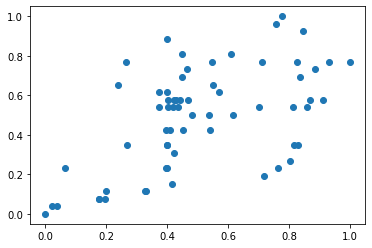

In [48]:
plt.scatter(y2,z1)

##  Regression model training

In [49]:
X = df_scaled[['Dummy','Y2']]
Y = df_scaled['Z1']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

## Linear Regression

In [51]:
mylm = LinearRegression()
mylm.fit(X_train,y_train)

LinearRegression()

In [52]:
mylm.intercept_

0.20434298186755273

In [53]:
coeff_df = pd.DataFrame( mylm.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Dummy     0.000000
Y2        0.538349

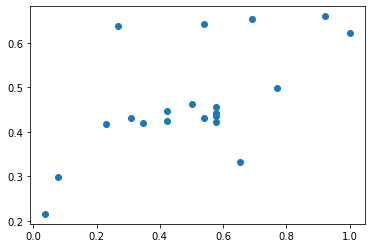

In [54]:
predictions = mylm.predict(X_test)
plt.scatter(y_test,predictions)

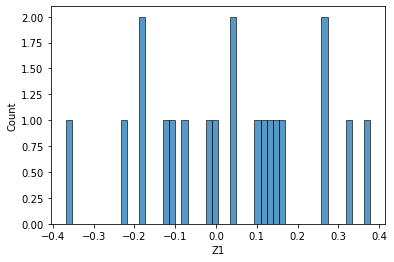

In [55]:
sns.histplot((y_test-predictions),bins=50);

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', metrics.r2_score(y_test, predictions))
print('Adjusted R^2:', adjusted_r2(predictions))

MAE: 0.16242248832184916
MSE: 0.03811803428952575
RMSE: 0.19523840372612594
R^2: 0.35333982860356605
Adjusted R^2: 0.33213785577089605


## Ridge Regression 

In [57]:
rr = Ridge(alpha=0.01)
rr.fit(X_train,y_train)

Ridge(alpha=0.01)

In [58]:
rr.intercept_

0.20531033338195515

In [59]:
coeff_df = pd.DataFrame(rr.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Dummy     0.000000
Y2        0.536471

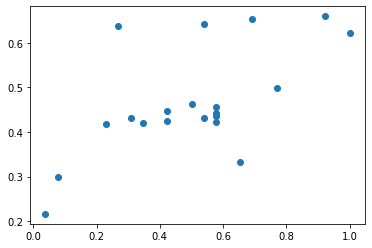

In [60]:
predictions_rr = rr.predict(X_test)
plt.scatter(y_test,predictions_rr)

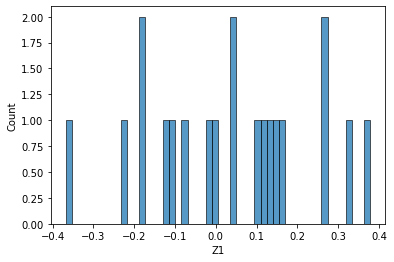

In [61]:
sns.histplot((y_test-predictions_rr),bins=50);

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_rr))
print('MSE:', metrics.mean_squared_error(y_test, predictions_rr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_rr)))
print('R^2:', metrics.r2_score(y_test, predictions_rr))
print('Adjusted R^2:', adjusted_r2(predictions_rr))

MAE: 0.16251301959468903
MSE: 0.03814290287468865
RMSE: 0.19530208108130503
R^2: 0.35291794106808405
Adjusted R^2: 0.33170213585720154


## Lasso Regression

In [63]:
lr = Lasso(alpha=0.01)
lr.fit(X_train,y_train)

Lasso(alpha=0.01)

In [64]:
lr.intercept_

0.2836827097999296

In [65]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Dummy     0.000000
Y2        0.384319

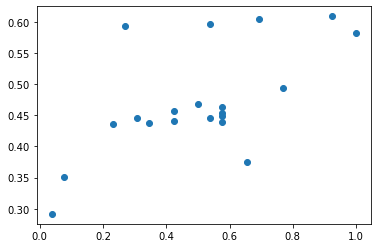

In [66]:
predictions_lr = lr.predict(X_test)
plt.scatter(y_test,predictions_lr)

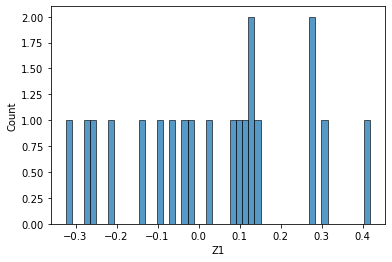

In [67]:
sns.histplot((y_test-predictions_lr),bins=50);

In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lr))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lr)))
print('R^2:', metrics.r2_score(y_test, predictions_lr))
print('Adjusted R^2:', adjusted_r2(predictions_lr))

MAE: 0.16984763466166924
MSE: 0.04130270630186997
RMSE: 0.20323067264040132
R^2: 0.299312893906416
Adjusted R^2: 0.2763395461656427


## Elastic Net Regression 

In [69]:
enr = ElasticNet(alpha=0.01)
enr.fit(X_train,y_train)

ElasticNet(alpha=0.01)

In [70]:
enr.intercept_

0.26100524640265454

In [71]:
coeff_df = pd.DataFrame(enr.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Dummy     0.000000
Y2        0.428345

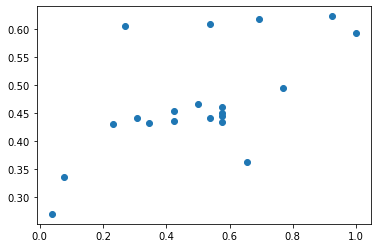

In [72]:
predictions_enr = enr.predict(X_test)
plt.scatter(y_test,predictions_enr)

<AxesSubplot:xlabel='Z1', ylabel='Count'>

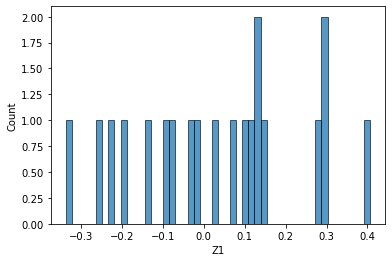

In [73]:
sns.histplot((y_test-predictions_enr),bins=50)

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_enr))
print('MSE:', metrics.mean_squared_error(y_test, predictions_enr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_enr)))
print('R^2:', metrics.r2_score(y_test, predictions_enr))
print('Adjusted R^2:', adjusted_r2(predictions_enr))

MAE: 0.16772532483368244
MSE: 0.04015582333608077
RMSE: 0.20038917968812778
R^2: 0.318769393934611
Adjusted R^2: 0.2964339642275491


# Inference

In [75]:
inference = {
	'Regression': ['Linear', 'Ridge', 'Lasso', 'ElasticNet'],
	'MAE': 
		[
			metrics.mean_absolute_error(y_test, predictions), 
			metrics.mean_absolute_error(y_test, predictions_rr),
			metrics.mean_absolute_error(y_test, predictions_lr), 
			metrics.mean_absolute_error(y_test, predictions_enr)
		],
	'MSE':
		[
			metrics.mean_squared_error(y_test, predictions), 
			metrics.mean_squared_error(y_test, predictions_rr),
			metrics.mean_squared_error(y_test, predictions_lr), 
			metrics.mean_squared_error(y_test, predictions_enr)
		],
	'RMSE':
		[
			np.sqrt(metrics.mean_squared_error(y_test, predictions)), 
			np.sqrt(metrics.mean_squared_error(y_test, predictions_rr)),
			np.sqrt(metrics.mean_squared_error(y_test, predictions_lr)), 
			np.sqrt(metrics.mean_squared_error(y_test, predictions_enr))
		],
	'R2':
		[
			metrics.r2_score(y_test, predictions), 
			metrics.r2_score(y_test, predictions_rr),
			metrics.r2_score(y_test, predictions_lr), 
			metrics.r2_score(y_test, predictions_enr)
		],
	'Adjusted R2':
		[
			adjusted_r2(predictions), 
			adjusted_r2(predictions_rr),
			adjusted_r2(predictions_lr), 
			adjusted_r2(predictions_enr)
		]
}

In [76]:
Inference_Stage2 = pd.DataFrame(inference)
print(Inference_Stage2)

   Regression       MAE       MSE      RMSE        R2  Adjusted R2
0      Linear  0.162422  0.038118  0.195238  0.353340     0.332138
1       Ridge  0.162513  0.038143  0.195302  0.352918     0.331702
2       Lasso  0.169848  0.041303  0.203231  0.299313     0.276340
3  ElasticNet  0.167725  0.040156  0.200389  0.318769     0.296434


## Conclusion after Stage 2 :

#### Since the R^2  is highest for Linear Regression in stage 1 and the errors are the least Linear Regression is the suitable model here.

##### We found the Best model to be Linear Regression model as it has low MAE,MSE and RMSE and a high Adjusted R^2 value after stage 2.

####  Thus we can imply that Linear Regression is the best model for the problem given.